# Problem

Utilizing this datatset, I will be attempting to answer the question: What factors best correlates to the energy efficiency of supercomputers? This problem is interested for those who are interested in tracking the environmetal impact of these large computer centers, or maybe a the government for setting regulations regarding them.

# Data Collection

The TOP500 list is an authoritative database tracking the 500 most powerful computer systems globally, based on their Rmax (essentially computation speed). Its creation and updates involve rigorous data collection, cross-verification, and vendor limitations to maintain statistical relevance.

Information is collected from manufacturers, vendors, or installation sites.
Random samples from the list are verified through direct contact with installation sites, ensuring the accuracy of vendor-provided data.

The list is availbe at https://top500.org/

# Data Preparation


First we import the csv file for the top 500

In [3]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

top500 = pd.read_csv("TOP500_202406.csv")
top500

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,...,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,1.0,59,1,Frontier,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",DOE/SC/Oak Ridge National Laboratory,HPE,United States,2021,...,AMD Instinct MI250X,64,AMD Zen-3 (Milan),HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,North America,"48,553",180047
1,2,2.0,62,2,Aurora,"HPE Cray EX - Intel Exascale Compute Blade, Xe...",DOE/SC/Argonne National Laboratory,Intel,United States,2023,...,Intel Data Center GPU Max,52,Intel Xeon Max,HPE Cray EX - Intel Exascale Compute Blade,HPE Cray EX - Intel Exascale Compute Blade,Gigabit Ethernet,Slingshot-11,North America,"47,347",180183
2,3,3.0,62,3,Eagle,"Microsoft NDv5, Xeon Platinum 8480C 48C 2GHz, ...",Microsoft Azure,Microsoft Azure,United States,2023,...,NVIDIA H100,48,Xeon Platinum (Sapphire Rapids),Microsoft NDv5,Microsoft Azure Cluster,Infiniband,NVIDIA Infiniband NDR,North America,"50,981",180236
3,4,4.0,55,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,...,NaN,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,"50,831",179807
4,5,5.0,59,3,LUMI,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",EuroHPC/CSC,HPE,Finland,2023,...,AMD Instinct MI250X,64,AMD Zen-3 (Milan),HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,Europe,"50,908",180048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,454.0,60,369,Hercules,"PowerEdge C6520, Xeon Platinum 8380 40C 2.3GHz...",Mississippi State University,DELL EMC,United States,2022,...,NaN,40,Xeon Platinum 83xx (Ice Lake),PowerEdge C6520,Dell PowerEdge Cluster,Infiniband,Infiniband NDR,North America,"48,371",180124
496,497,455.0,59,363,Phoenix - 2022,"ThinkSystem SR670 V2, Xeon Platinum 8360Y 36C ...",University of Adelaide,Lenovo,Australia,2022,...,NVIDIA A100,36,Xeon Platinum 83xx (Ice Lake),ThinkSystem SR670 V2,Lenovo ThinkSystem,Infiniband,Infiniband HDR,Oceania,"50,921",180054
497,498,456.0,55,171,Betty,"Cray CS500, AMD EPYC 7542 32C 2.9GHz, InfiniBa...",US Army Research Laboratory (ARL),HPE,United States,2020,...,NaN,32,AMD Zen-2 (Rome),Cray CS500,Cray CS,Infiniband,InfiniBand HDR100,North America,"49,039",179844
498,499,457.0,61,414,NA3,"Lenovo ThinkSystem SR650 V2, Xeon Platinum 835...",Software Company,Lenovo,United States,2023,...,NaN,32,Xeon Platinum 83xx (Ice Lake),Lenovo ThinkSystem SR650 V2,Lenovo ThinkSystem,Gigabit Ethernet,100G Ethernet,North America,"50,969",180155


We check to see if there are any missing values in the dataset

In [4]:
top500.isnull().sum()

,0
Rank,0
Previous Rank,46
First Appearance,0
First Rank,0
Name,78
Computer,0
Site,0
Manufacturer,0
Country,0
Year,0


For most of the missing columns, I determined they were not relevant to my topic, so I decided to exclude them. However, Power, Power Source, and Energy Efficiency were crucial for the analysis. I noticed that these columns had missing values in the same rows, so I dropped them. Since the Power Source column was essentially a boolean indicating whether information was available in the other two columns, I also removed it.

In [5]:
columns_to_drop = [
    'Previous Rank',
    'Name',
    'Accelerator/Co-Processor Cores',
    'Nmax',
    'Nhalf',
    'HPCG [TFlop/s]',
    'Accelerator/Co-Processor',
    'Memory',
    'Site ID',
    'System ID'
]
top500 = top500.drop(columns=columns_to_drop)

In [6]:
top500 = top500.dropna(subset=['Power Source'])

top500 = top500.drop(columns=['Power Source'])
top500

,Rank,First Appearance,First Rank,Computer,Site,Manufacturer,Country,Year,Segment,Total Cores,...,Processor Speed (MHz),Operating System,OS Family,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent
0,1,59,1,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",DOE/SC/Oak Ridge National Laboratory,HPE,United States,2021,Research,"8,699,904",...,"2,000",HPE Cray OS,Linux,64,AMD Zen-3 (Milan),HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,North America
1,2,62,2,"HPE Cray EX - Intel Exascale Compute Blade, Xe...",DOE/SC/Argonne National Laboratory,Intel,United States,2023,Research,"9,264,128",...,"2,400",SUSE Linux Enterprise Server 15 SP4,Linux,52,Intel Xeon Max,HPE Cray EX - Intel Exascale Compute Blade,HPE Cray EX - Intel Exascale Compute Blade,Gigabit Ethernet,Slingshot-11,North America
3,4,55,1,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,Research,"7,630,848",...,"2,200",Red Hat Enterprise Linux,Linux,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia
4,5,59,3,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",EuroHPC/CSC,HPE,Finland,2023,Research,"2,752,704",...,"2,000",HPE Cray OS,Linux,64,AMD Zen-3 (Milan),HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,Europe
5,6,63,6,"HPE Cray EX254n, NVIDIA Grace 72C 3.1GHz, NVID...",Swiss National Supercomputing Centre (CSCS),HPE,Switzerland,2024,Research,"1,305,600",...,"3,100",Linux,Linux,72,NVIDIA Grace,HPE Cray EX254n,HPE Cray EX,Gigabit Ethernet,Slingshot-11,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,62,442,"ThinkSystem SD530, Xeon Gold 6248R 24C 3GHz, I...",Johns Hopkins University,Lenovo,United States,2020,Academic,"37,392",...,"3,000",Linux,Linux,24,Xeon Gold 62xx (Cascade Lake),ThinkSystem SD530,Lenovo ThinkSystem,Infiniband,Infiniband HDR,North America
492,493,53,114,"Sugon TC6000, Xeon Gold 5118 12C 2.3GHz, 10G E...",Internet Company,Sugon,China,2019,Industry,"121,920",...,"2,300",Linux,Linux,12,Xeon Gold (Skylake),Sugon TC6000,Sugon Cluster,Gigabit Ethernet,10G Ethernet,Asia
493,494,61,410,"ThinkSystem SD650-N V2, Xeon Platinum 8360Y 36...",Zuse Institute Berlin,Lenovo,Germany,2023,Research,"21,168",...,"2,400",Rocky Linux 8.6,Linux,36,Xeon Platinum 83xx (Ice Lake),ThinkSystem SD650-N V2,Lenovo ThinkSystem,Infiniband,Infiniband HDR200,Europe
496,497,59,363,"ThinkSystem SR670 V2, Xeon Platinum 8360Y 36C ...",University of Adelaide,Lenovo,Australia,2022,Academic,"20,160",...,"2,400",Linux,Linux,36,Xeon Platinum 83xx (Ice Lake),ThinkSystem SR670 V2,Lenovo ThinkSystem,Infiniband,Infiniband HDR,Oceania


In [7]:
top500.isnull().sum().sum()

0

We then verify that there are no duplicated rows

In [8]:
top500.duplicated().sum()

0

In [9]:
top500.dtypes

,0
Rank,int64
First Appearance,int64
First Rank,int64
Computer,object
Site,object
Manufacturer,object
Country,object
Year,int64
Segment,object
Total Cores,object


The following columns have to be converted into integers: Total Cores, Processor Speed (MHz), Cores Per Socket. Likewise the following columns have to be converted to floats: Rmax [TFlop/s], Rpeak [TFlop/s], Power (kW).


In [10]:
for col in ['Total Cores', 'Processor Speed (MHz)']:
    top500[col] = top500[col].replace(',', '', regex=True).astype(int)

for col in ['Rmax [TFlop/s]', 'Rpeak [TFlop/s]', 'Power (kW)']:
    top500[col] = top500[col].replace(',', '', regex=True).astype(float)

The data is clean and ready for exploratory data analysis

# Exploratory Data Analysis

First, we get a sense of the data using .describe

In [11]:
top500.describe()

,Rank,First Appearance,First Rank,Year,Total Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Power (kW),Energy Efficiency [GFlops/Watts],Processor Speed (MHz),Cores per Socket
count,194.000000,194.000000,194.000000,194.000000,1.940000e+02,1.940000e+02,1.940000e+02,194.000000,194.000000,194.000000,194.000000
mean,207.412371,55.845361,101.092784,2020.211340,4.115402e+05,3.004305e+04,4.504584e+04,2090.737732,15.247371,2376.484536,40.886598
std,146.150164,5.959866,112.224570,2.729929,1.358991e+06,1.224874e+05,1.972081e+05,4477.677350,16.593674,395.691396,27.258835
min,1.000000,37.000000,1.000000,2013.000000,1.664000e+03,2.129920e+03,2.522270e+03,44.070000,0.190000,1400.000000,4.000000
25%,90.500000,52.000000,21.000000,2018.000000,5.555200e+04,3.049858e+03,4.275100e+03,385.515000,4.075000,2100.000000,20.000000
50%,172.500000,57.000000,63.500000,2021.000000,9.612000e+04,5.194500e+03,7.252000e+03,910.860000,6.630000,2375.000000,36.000000
75%,309.500000,61.000000,121.000000,2022.750000,2.134400e+05,1.038767e+04,1.526806e+04,1498.900000,23.475000,2600.000000,64.000000
max,500.000000,63.000000,470.000000,2024.000000,1.064960e+07,1.206000e+06,1.980006e+06,38698.360000,66.910000,3600.000000,260.000000


In [12]:
top500.select_dtypes(include=['object']).describe()

,Computer,Site,Manufacturer,Country,Segment,Architecture,Processor,Processor Technology,Operating System,OS Family,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent
count,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194
unique,155,118,28,27,6,2,80,18,49,1,23,91,41,5,37,5
top,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",ECMWF,HPE,United States,Research,Cluster,AMD EPYC 7742 64C 2.25GHz,AMD Zen-3 (Milan),Linux,Linux,AMD Zen-3 (Milan),BullSequana XH2000,HPE Cray EX,Infiniband,Infiniband HDR,Europe
freq,6,6,59,47,92,154,15,29,39,194,29,14,22,127,22,89


Seeing this, I want to explore only some parts of the dataset, as its quite big and some of the columns are faily repetitve. I identified a few columns as worth exploring further.

From the numerical data I chose: Total Cores, Rmax [TFlop/s], Power (kW), Processor Speed (MHz).

Likewise, from the categorical data: Manufacturer, Country, Processor Technology, Processor Speed, Cores per Socket, and Year.

Next, we create box plots and bar charts to get a sense of how the data is distributed.

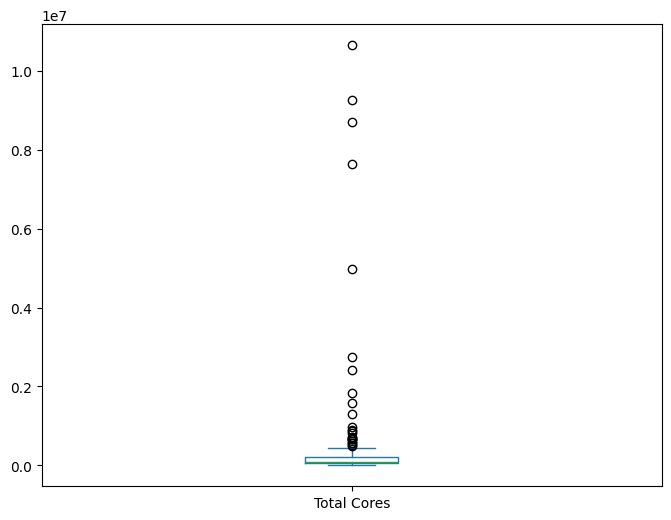

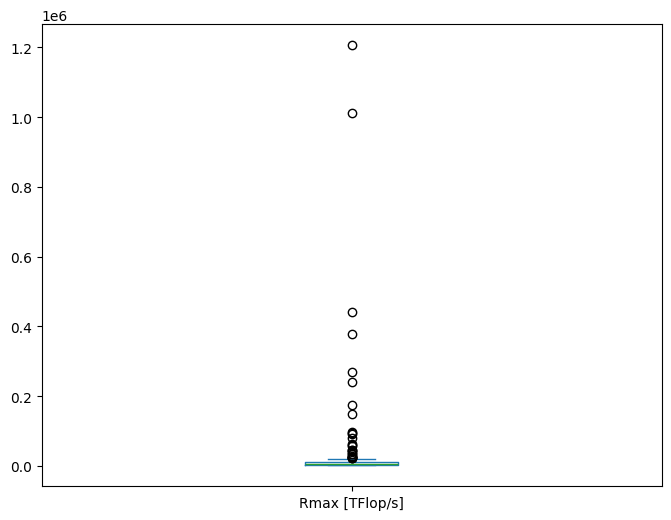

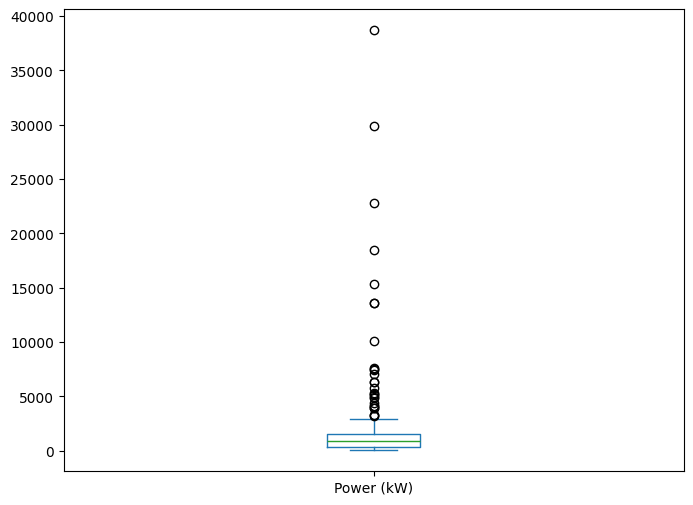

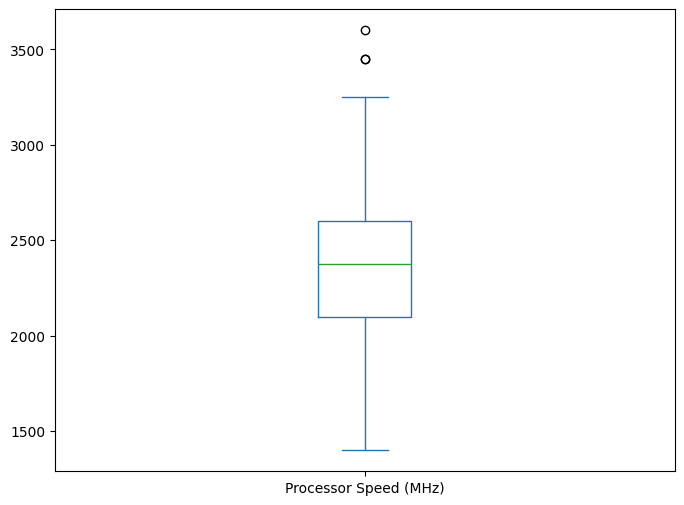

In [13]:
numerical_columns = ['Total Cores', 'Rmax [TFlop/s]', 'Power (kW)', 'Processor Speed (MHz)']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    top500[col].plot.box()
    plt.show()

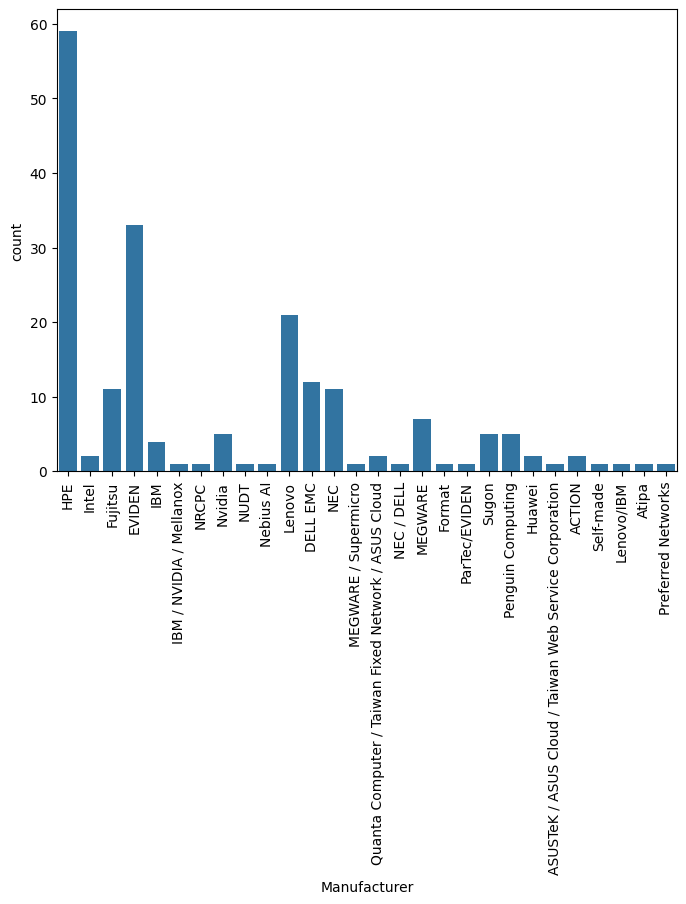

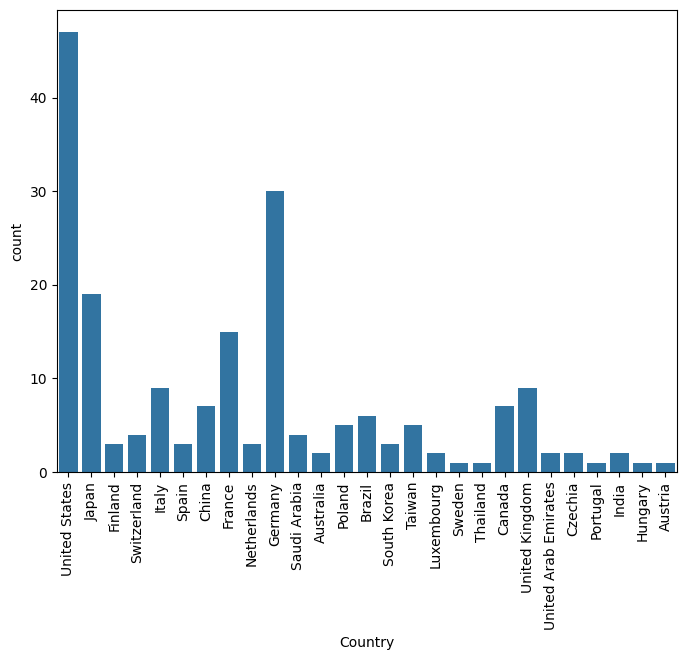

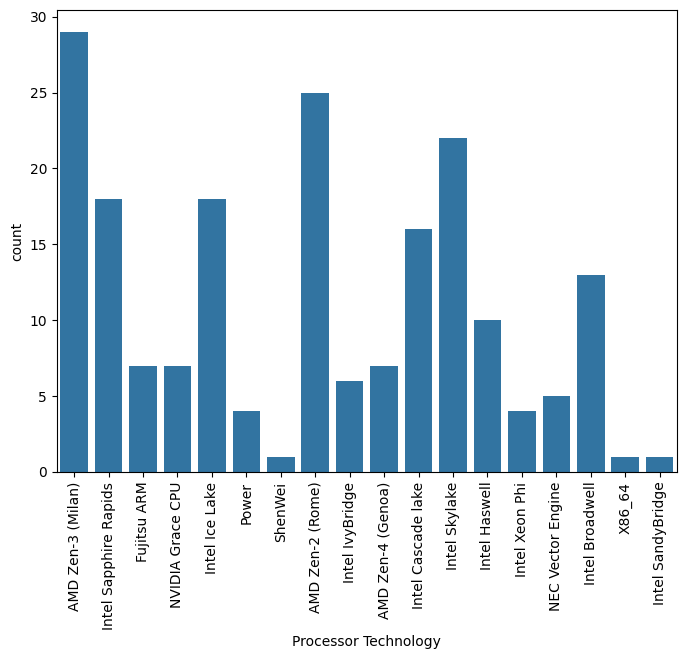

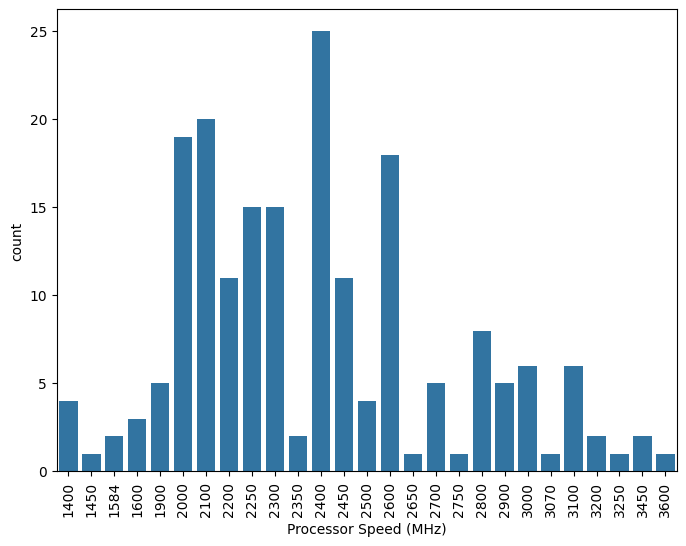

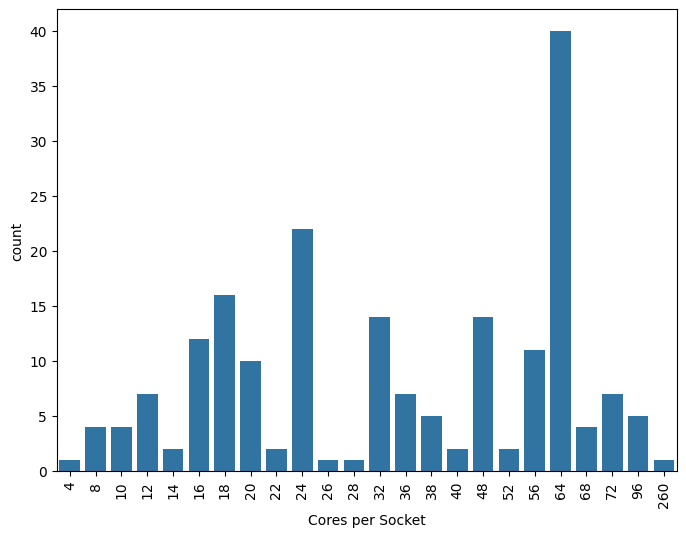

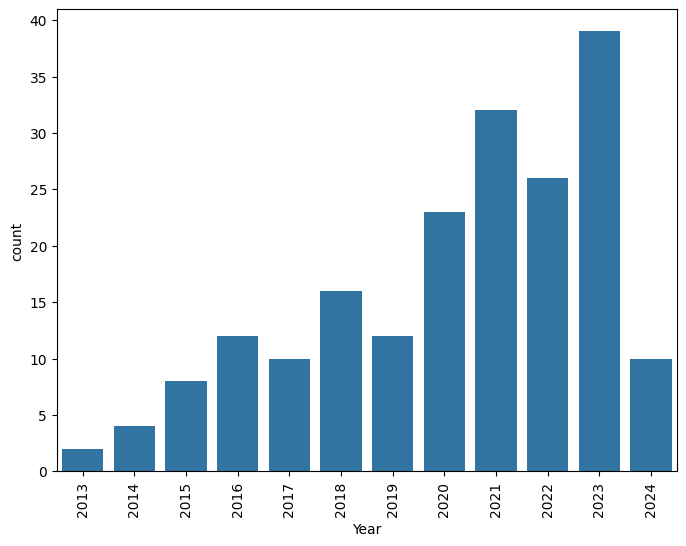

In [14]:
categorical_columns = ['Manufacturer', 'Country', 'Processor Technology',
                       'Processor Speed (MHz)', 'Cores per Socket', 'Year']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=top500, x=col)
    plt.xticks(rotation=90)
    plt.show()


There are outliers in the numerical columns, so I decided to remove them.



In [15]:
thresholds = {
    'Total Cores': 250000,
    'Rmax [TFlop/s]': 15000,
    'Power (kW)': 2500,
    'Processor Speed (MHz)': 3500
}

for col in numerical_columns:
    top500 = top500[top500[col] <= thresholds[col]]

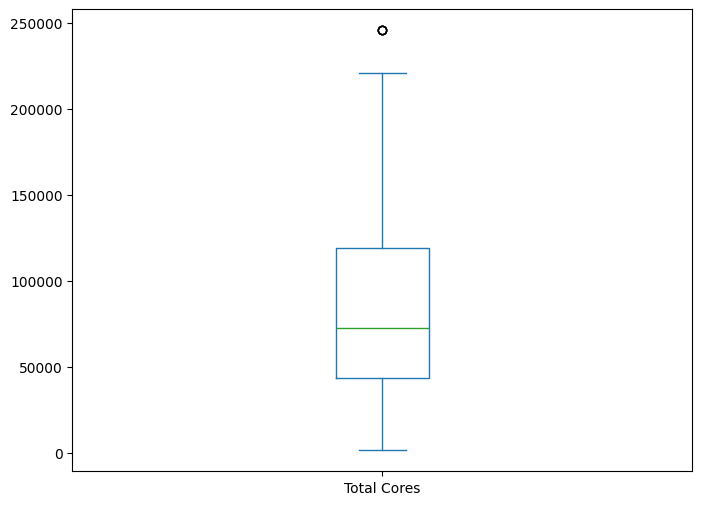

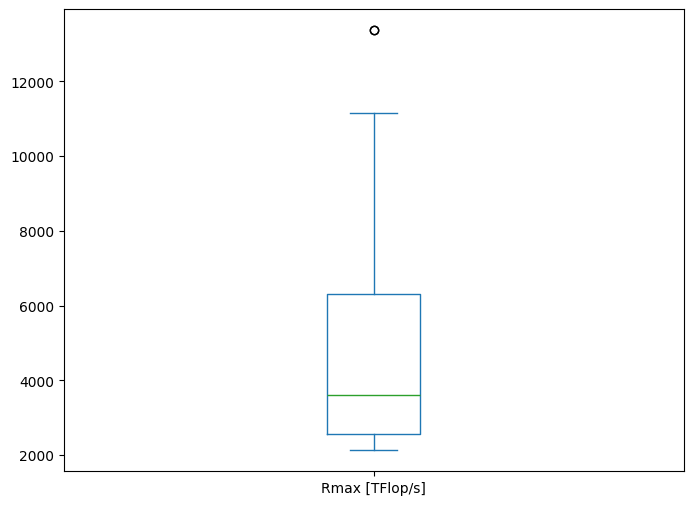

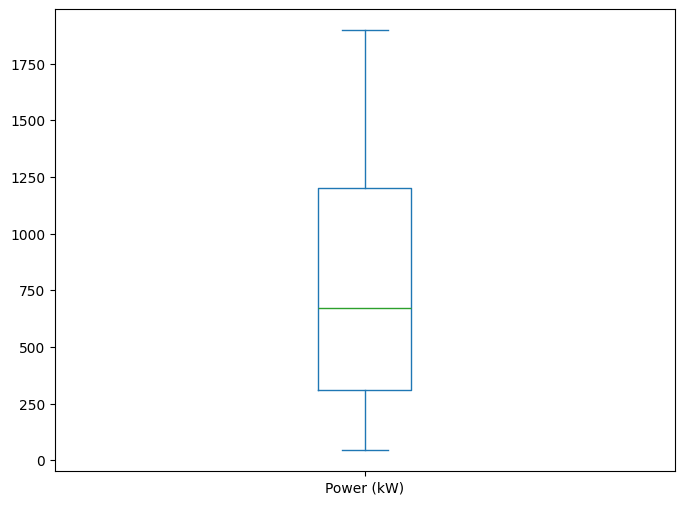

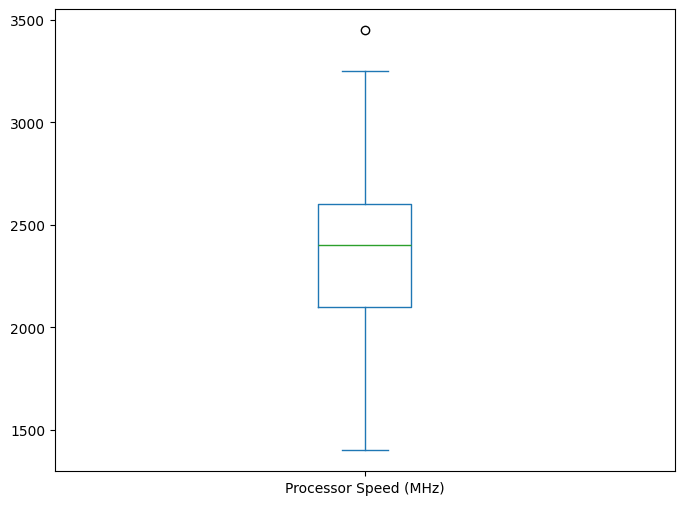

In [16]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    top500[col].plot.box()
    plt.show()

In order to determine which factors have a relationship with efficency, I used scatter plots for the numerical features and box plots for the categorical ones.

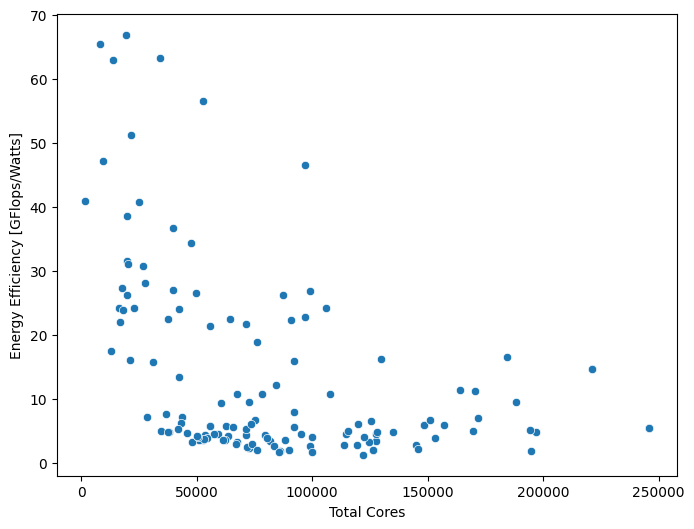

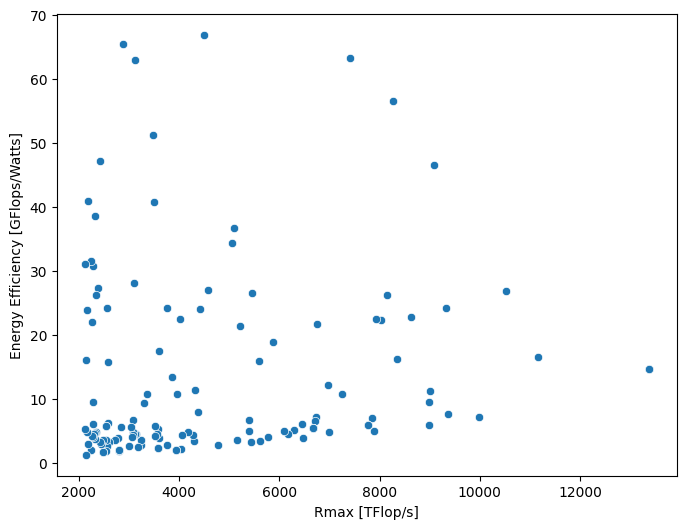

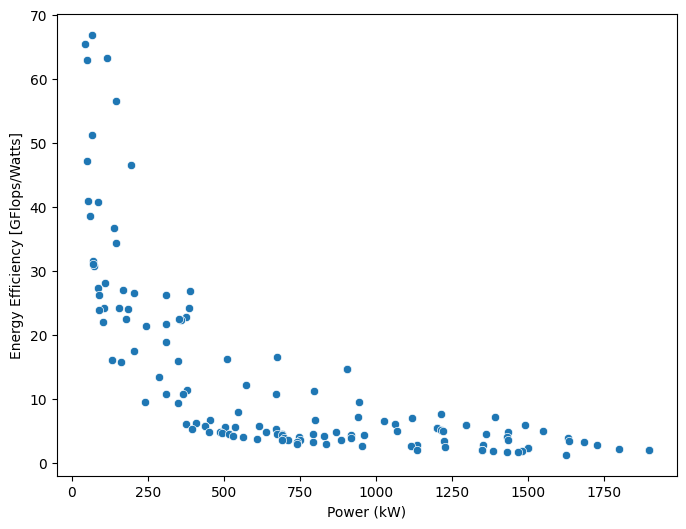

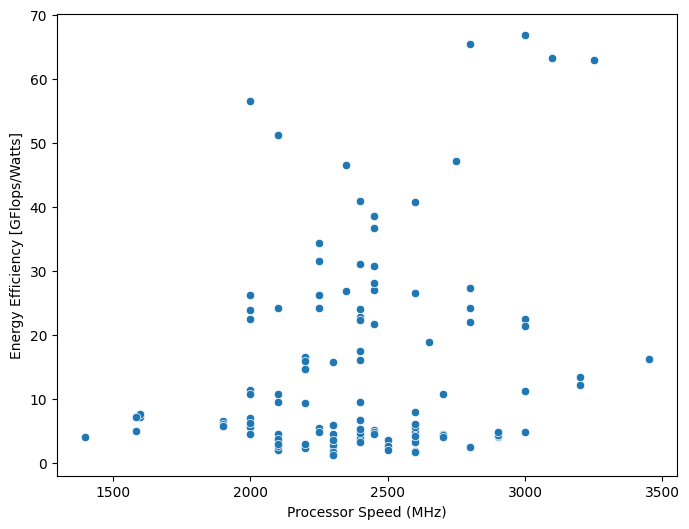

In [17]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=top500[col], y=top500['Energy Efficiency [GFlops/Watts]'])
    plt.show()

We observe that Processor Speed does not seem to correlate with energy efficiency.

Both Total Cores and Power appear to have a negative correlation with efficiency, while RMax [TFlop/s] shows a low positive correlation.

To validate these findings, we use a correlation table, which confirms the relationships between these factors and energy efficiency.

In [18]:
top500[numerical_columns + ['Energy Efficiency [GFlops/Watts]']].corr()

,Total Cores,Rmax [TFlop/s],Power (kW),Processor Speed (MHz),Energy Efficiency [GFlops/Watts]
Total Cores,1.000000,0.532648,0.601874,-0.137053,-0.428177
Rmax [TFlop/s],0.532648,1.000000,0.193219,-0.109751,0.107872
Power (kW),0.601874,0.193219,1.000000,-0.229610,-0.681936
Processor Speed (MHz),-0.137053,-0.109751,-0.229610,1.000000,0.254901
Energy Efficiency [GFlops/Watts],-0.428177,0.107872,-0.681936,0.254901,1.000000


In [19]:
for col in numerical_columns:
    corr, p_value = pearsonr(top500[col], top500['Energy Efficiency [GFlops/Watts]'])
    print (corr, p_value)

-0.428177492966053 1.7953089265488895e-07
0.10787201997660492 0.20958567659937918
-0.681936223164538 4.5761789430273356e-20
0.2549013032620962 0.002646875298913164


All four categories show a significant correlation with energy efficiency, as indicated by their low p-values, with Power (kW) having the strongest correlation. This suggests that each factor contributes to energy efficiency, with power consumption being the most influential.

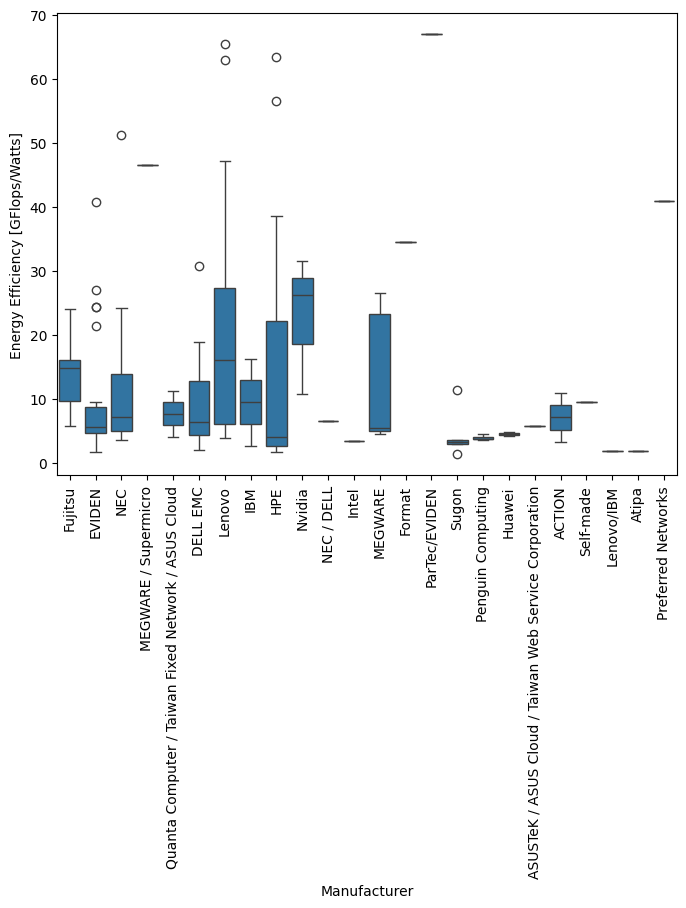

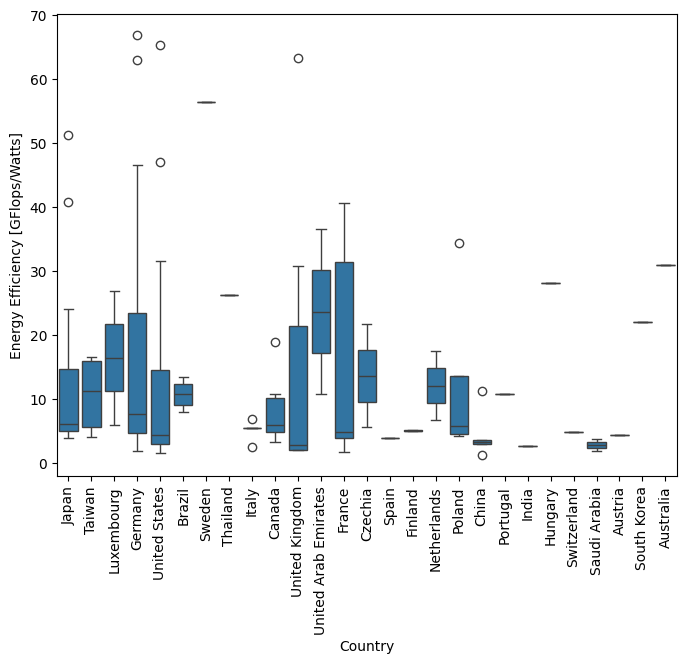

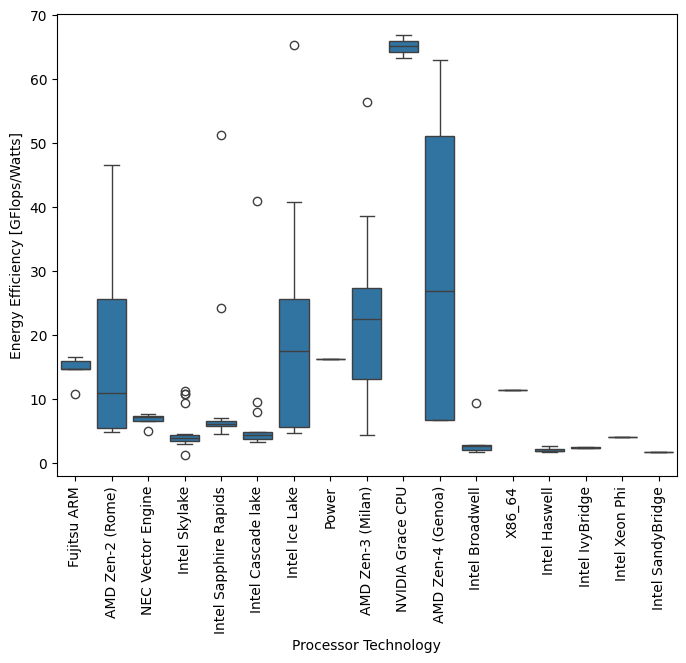

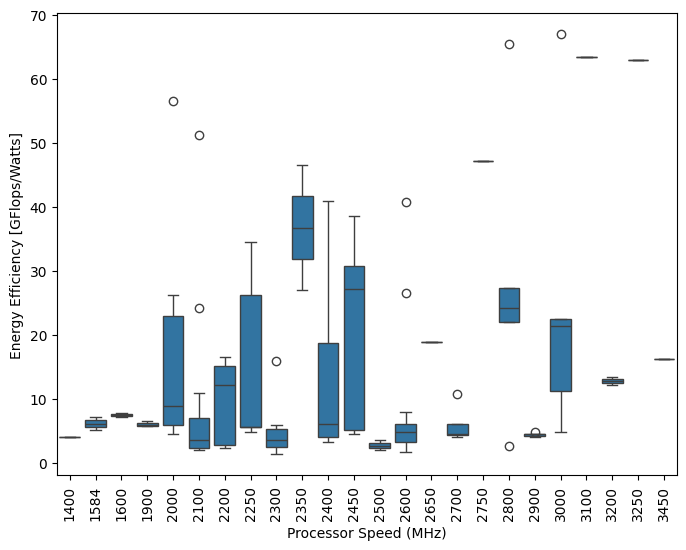

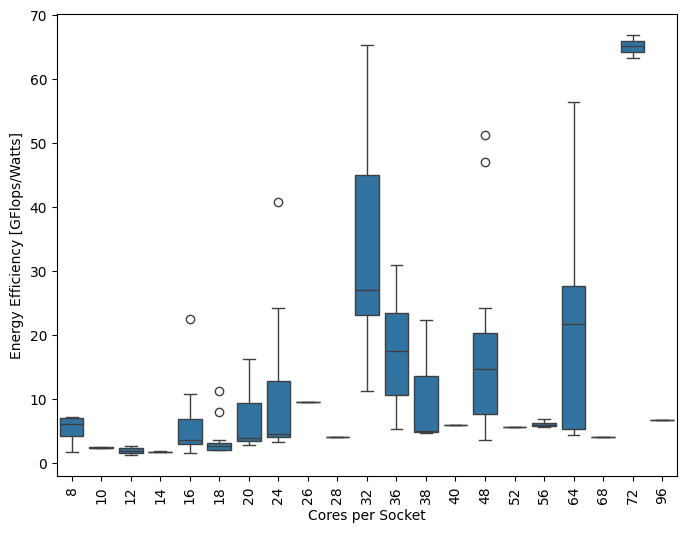

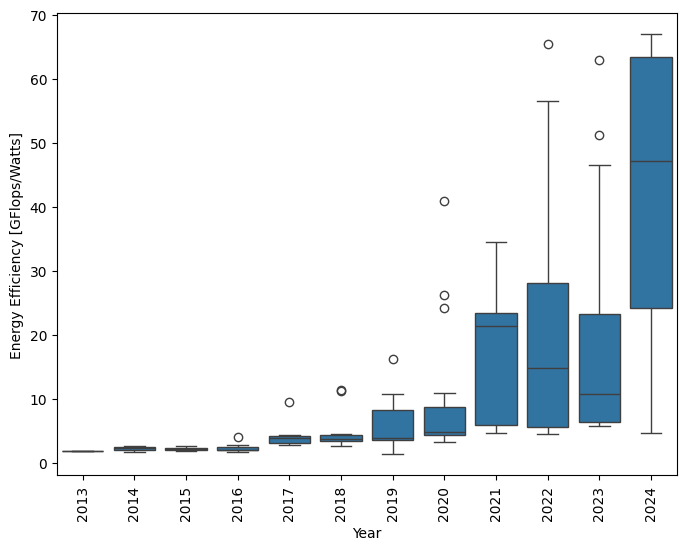

In [20]:
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=top500[col], y=top500['Energy Efficiency [GFlops/Watts]'])
    plt.xticks(rotation=90)
    plt.show()


Country does play a role, with Sweden showing significantly higher energy efficiency compared to other countries, but overall, most countries exhibit similar levels of efficiency. AMD Zen-4 and NVIDIA Grace CPUs generally offer better energy efficiency. Additionally, energy efficiency has improved over time, especially in 2024, when it was notably higher than in previous years.

# Conclusion Section


In this analysis, we found that numerical factors like Power (kW), Rmax [TFlop/s], Total Cores, and Processor Speed (MHz) are significantly correlated with energy efficiency, with Power (kW) being the most influential. Geographically, Sweden stands out with higher energy efficiency, while most countries show similar levels. AMD Zen-4 and NVIDIA Grace processors also demonstrate better energy efficiency, likely due to innovations in chip design. Furthermore, energy efficiency has improved over time, especially in 2024.


The biggest shortcoming in the project was the size of the data, we had to cut a significant amount of the dataset in order to analyze it. In the future, finding a more complete dataset would be benificial for my analysis.